In [2128]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np
import scipy as sp
import scipy.stats as st
import scipy.integrate as integrate
from sklearn import linear_model
from scipy.stats import multivariate_normal
# from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
import statsmodels.api as sm
import random

sns.set_style("whitegrid")
sns.set_palette("colorblind")
palette = sns.color_palette()
figsize = (15,8)
legend_fontsize = 16

from matplotlib import rc
rc('font',**{'family':'sans-serif'})
rc('figure', **{'dpi': 300})

In [920]:
import pandas as pd
import numpy as np


# Russia

# 1 Исходные данные

In [2365]:
data = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

In [2366]:

df = data[data.location == 'Russia']
# date_datetime = pd.to_datetime(df.date, infer_datetime_format=True)  
# df.date = date_datetime
df = df[df.date >= '2020-03-03']
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
123955,RUS,Europe,Russia,2020-03-03,3.0,0.0,0.143,NaN,NaN,NaN,...,23.4,58.3,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN
123956,RUS,Europe,Russia,2020-03-04,3.0,0.0,0.143,NaN,NaN,NaN,...,23.4,58.3,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN
123957,RUS,Europe,Russia,2020-03-05,4.0,1.0,0.286,NaN,NaN,NaN,...,23.4,58.3,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN
123958,RUS,Europe,Russia,2020-03-06,13.0,9.0,1.571,NaN,NaN,NaN,...,23.4,58.3,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN
123959,RUS,Europe,Russia,2020-03-07,13.0,0.0,1.571,NaN,NaN,NaN,...,23.4,58.3,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN


In [2367]:
# Заменим в столбце new_cases все нули на единицы
df.new_cases[df.new_cases == 0] = 1


In [2368]:
# Делим на train и test и берем целевые колонки
df = df.reset_index()
train = df[['date', 'total_cases', 'new_cases']][0:50]
test = df[['date', 'total_cases', 'new_cases']][50:]
test_df = df[['date', 'total_cases', 'new_cases']]


# 2. Линейная регресия с экспоненциальной функцией зависимости


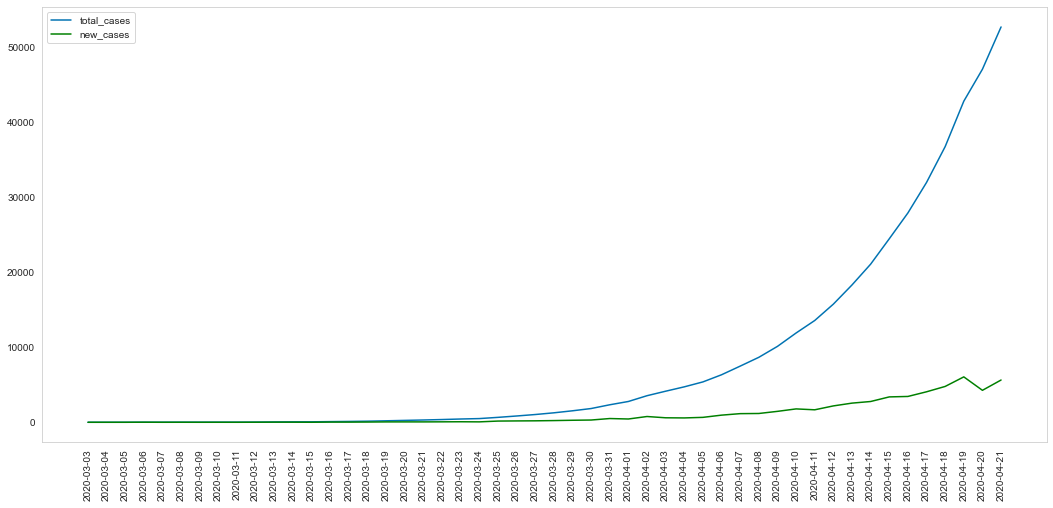

In [1718]:
import matplotlib.pyplot as plt 
%matplotlib inline

f, ax = plt.subplots(1, 1, figsize=(18, 8))
ax.plot(train.date, train.total_cases) 
ax.plot(train.date, train.new_cases,  c='g') 
ax.legend(['total_cases', 'new_cases'])
plt.xticks(rotation=90) 
ax.grid()

In [2167]:
# Прологарифмируем число заболевших для последущего обучения модели
y_log = np.log(train[['total_cases']]).values
# Добавим линейную функцию зависимости
train_data = np.vstack((np.array(y_train.index))).reshape(-1,1)



In [2168]:
def train_model(xs, ys, alpha, use_lasso):
    if alpha == 0:
        return linear_model.LinearRegression(fit_intercept=True).fit( xs, ys )
    else:
        if use_lasso:
            return linear_model.Lasso(alpha=alpha, fit_intercept=True).fit( xs, ys )
        else:
            return linear_model.Ridge(alpha=alpha, fit_intercept=True).fit( xs, ys )

[[0.19829089]] [1.82073762]


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 <a list of 50 Text major ticklabel objects>)

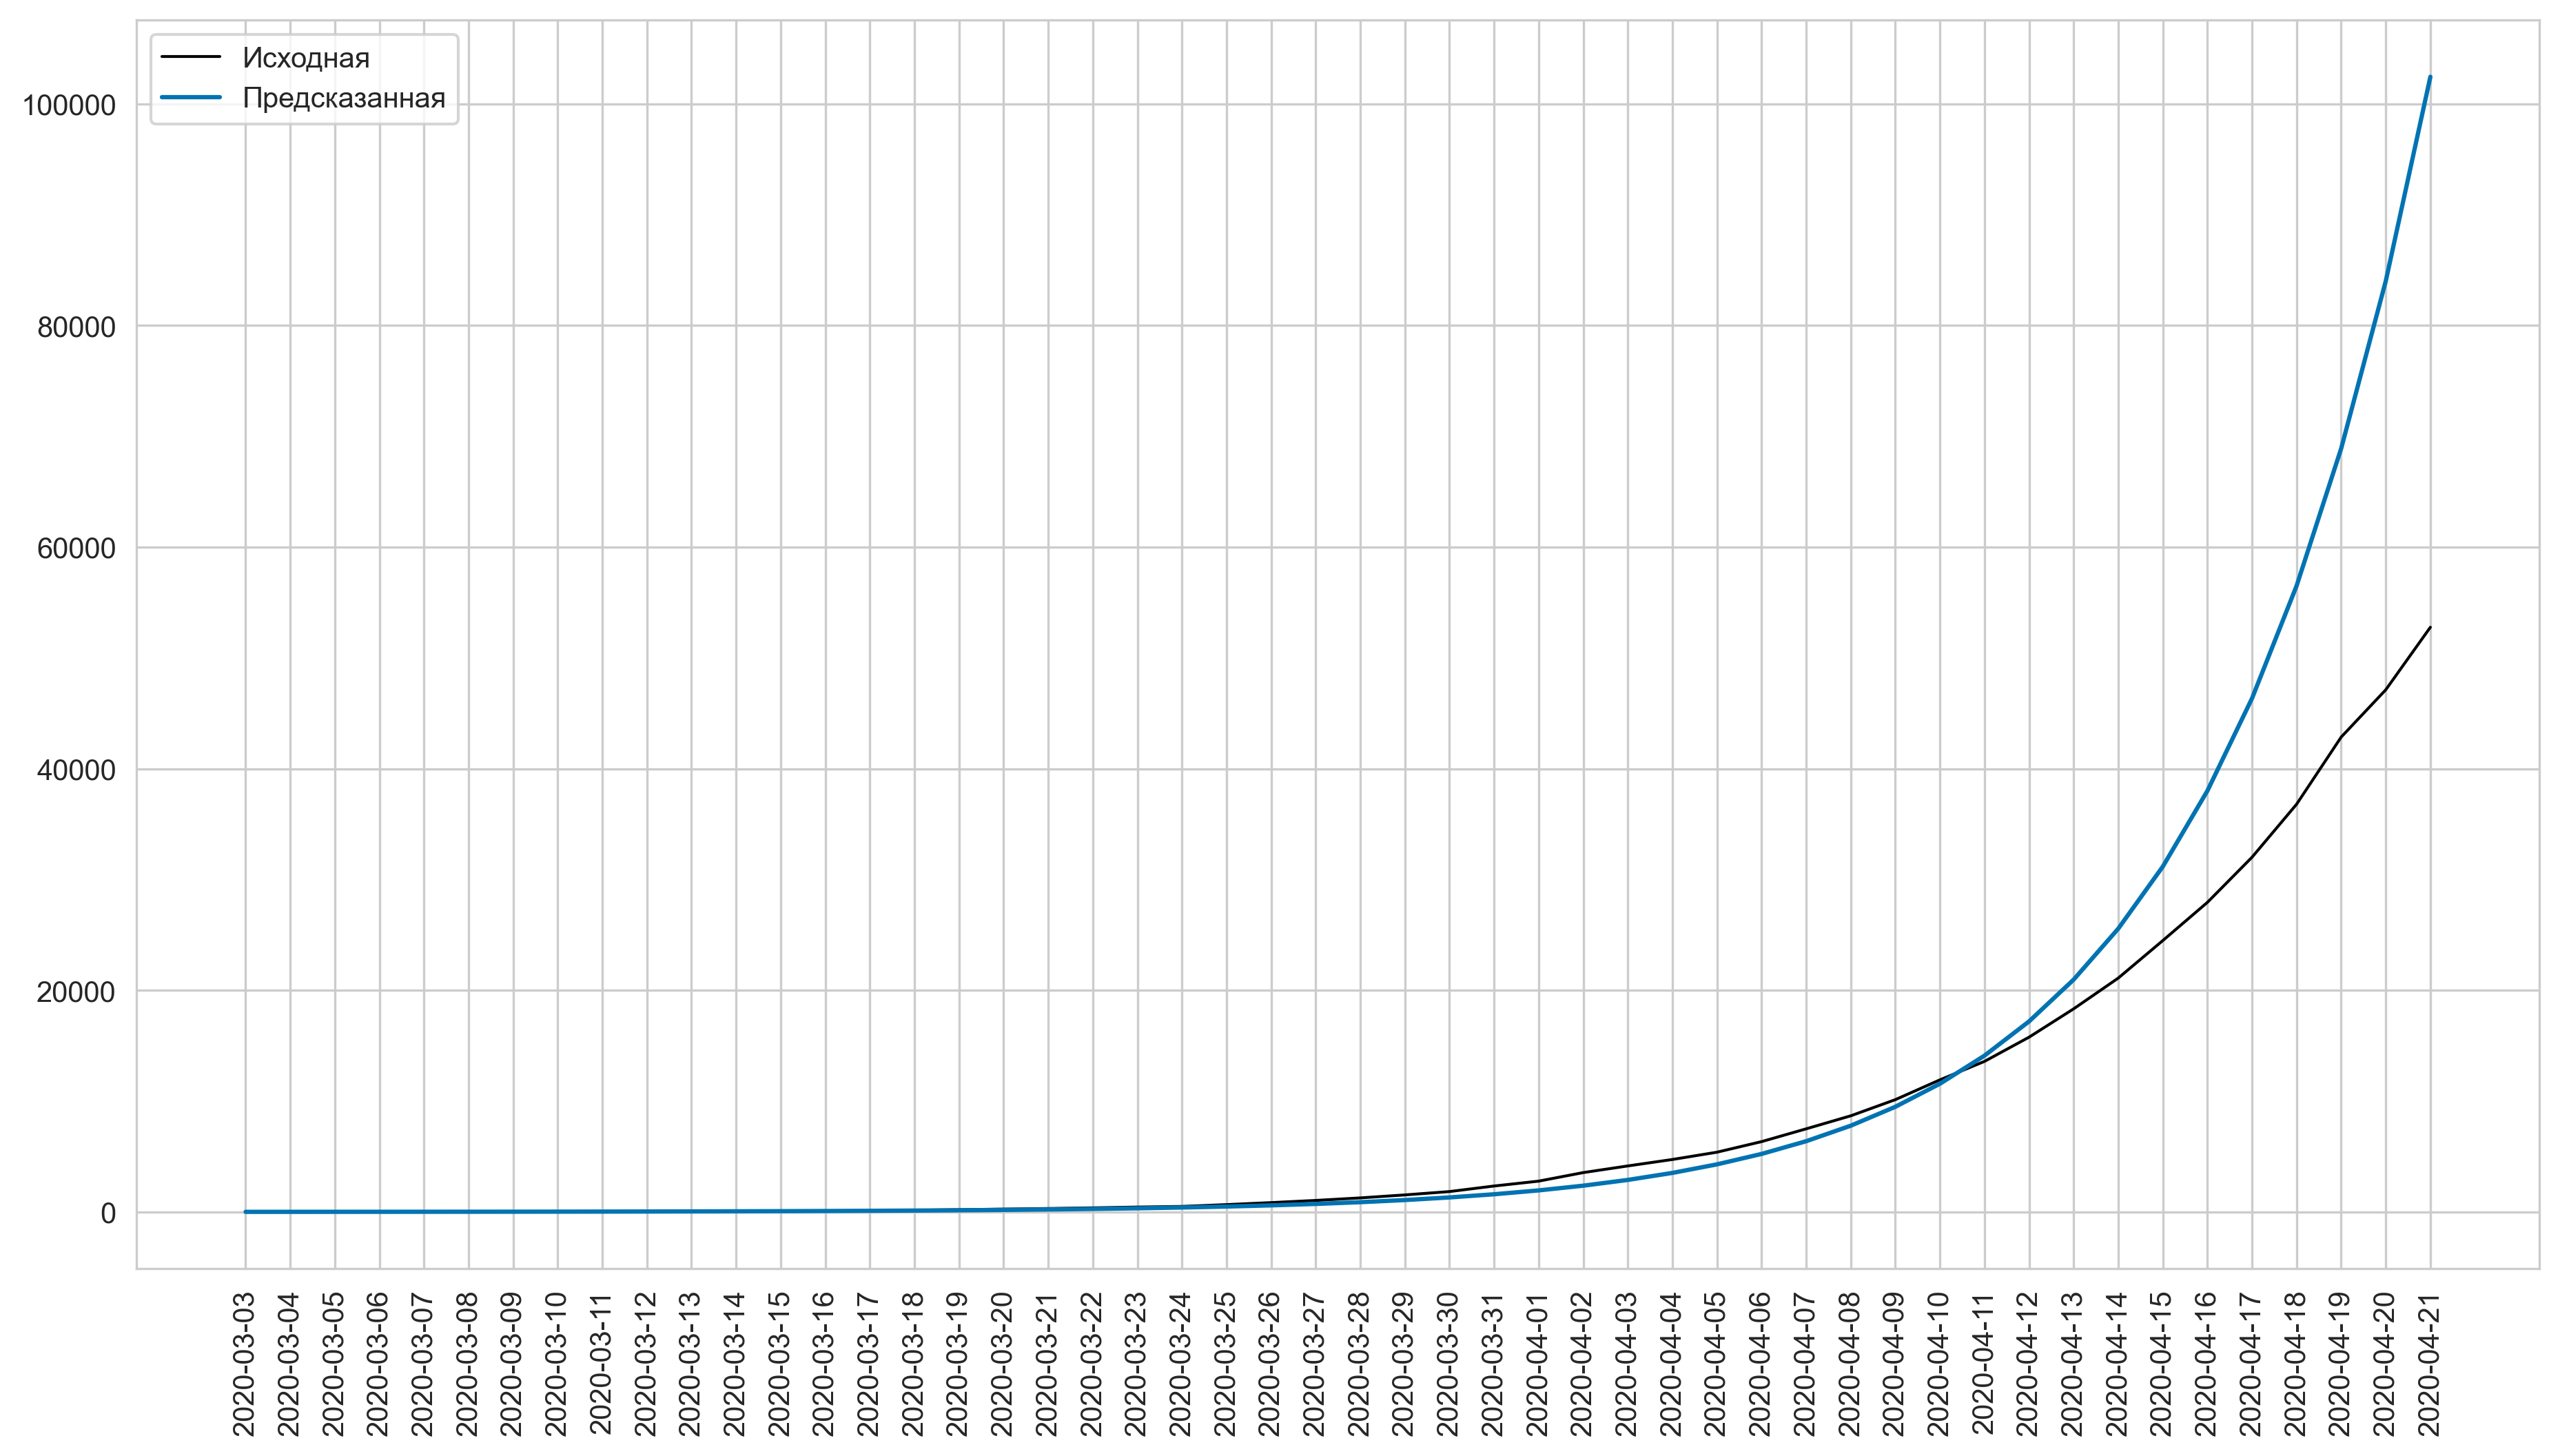

In [2169]:
alpha = 0.001
use_lasso = False


sns.set_style("whitegrid")
sns.set_palette("colorblind")
palette = sns.color_palette()
figsize = (15,8)
legend_fontsize = 16

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.plot(train.date, train.total_cases, linewidth=1, label="Исходная функция", color="black")

cur_model = train_model(train_data, y_log, alpha, use_lasso)
y_pred = np.exp(cur_model.predict(train_data))
print(cur_model.coef_, cur_model.intercept_)
ax.plot(train.date, y_pred)
ax.legend(['Исходная', 'Предсказанная'])


plt.xticks(rotation=90)


In [2170]:
# Запомним параметры обученной модели
w, intersept = cur_model.coef_, cur_model.intercept_
w, intersept

(array([[0.19829089]]), array([1.82073762]))

In [2187]:
# Определим среднеквадратичное отклонение шума 
sigma_noise = (train.total_cases.values - y_pred.reshape(1,50)).std()
sigma_noise

9777.296339500044

In [2306]:
def bayesian_update(mu, sigma, x, y, sigma_noise):
    x_matrix = np.array([[1, x]])
    sigma_n = np.linalg.inv(np.linalg.inv(sigma)+ (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), x_matrix) )
    mu_n = np.matmul(sigma_n, np.matmul(np.linalg.inv(sigma), np.transpose(mu)) + 
                     (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), np.array([y]) ) )
    return mu_n, sigma_n

In [2307]:
def true_curve(x):
    return  np.exp(w[0] * x + intersept)

def sample_statistics(mu, sigma, xs, n=200):
    my_w = np.random.multivariate_normal(mu, sigma, n)
    res = np.zeros((n, xs.shape[0]))
    for i,w_ in enumerate(my_w):
        res[i,:] = np.exp(w_[0] + w_[1] * xs)
    return res

In [2309]:
# Баесовский вывод
cur_mu, cur_sigma = np.array([0, 0]), (1.27)*np.array([[1, 0], [0, 1]])
print(cur_mu, cur_sigma)
xd = train.index
data = train.total_cases
for i in range(1, xd.shape[0]):
    cur_mu, cur_sigma = bayesian_update(cur_mu, cur_sigma, xd[i], data[i], sigma_noise)
cur_mu, cur_sigma

[0 0] [[1.27 0.  ]
 [0.   1.27]]


(array([0.00544469, 0.23408428]),
 array([[ 1.26999917e+00, -2.06572505e-05],
        [-2.06572505e-05,  1.26931831e+00]]))

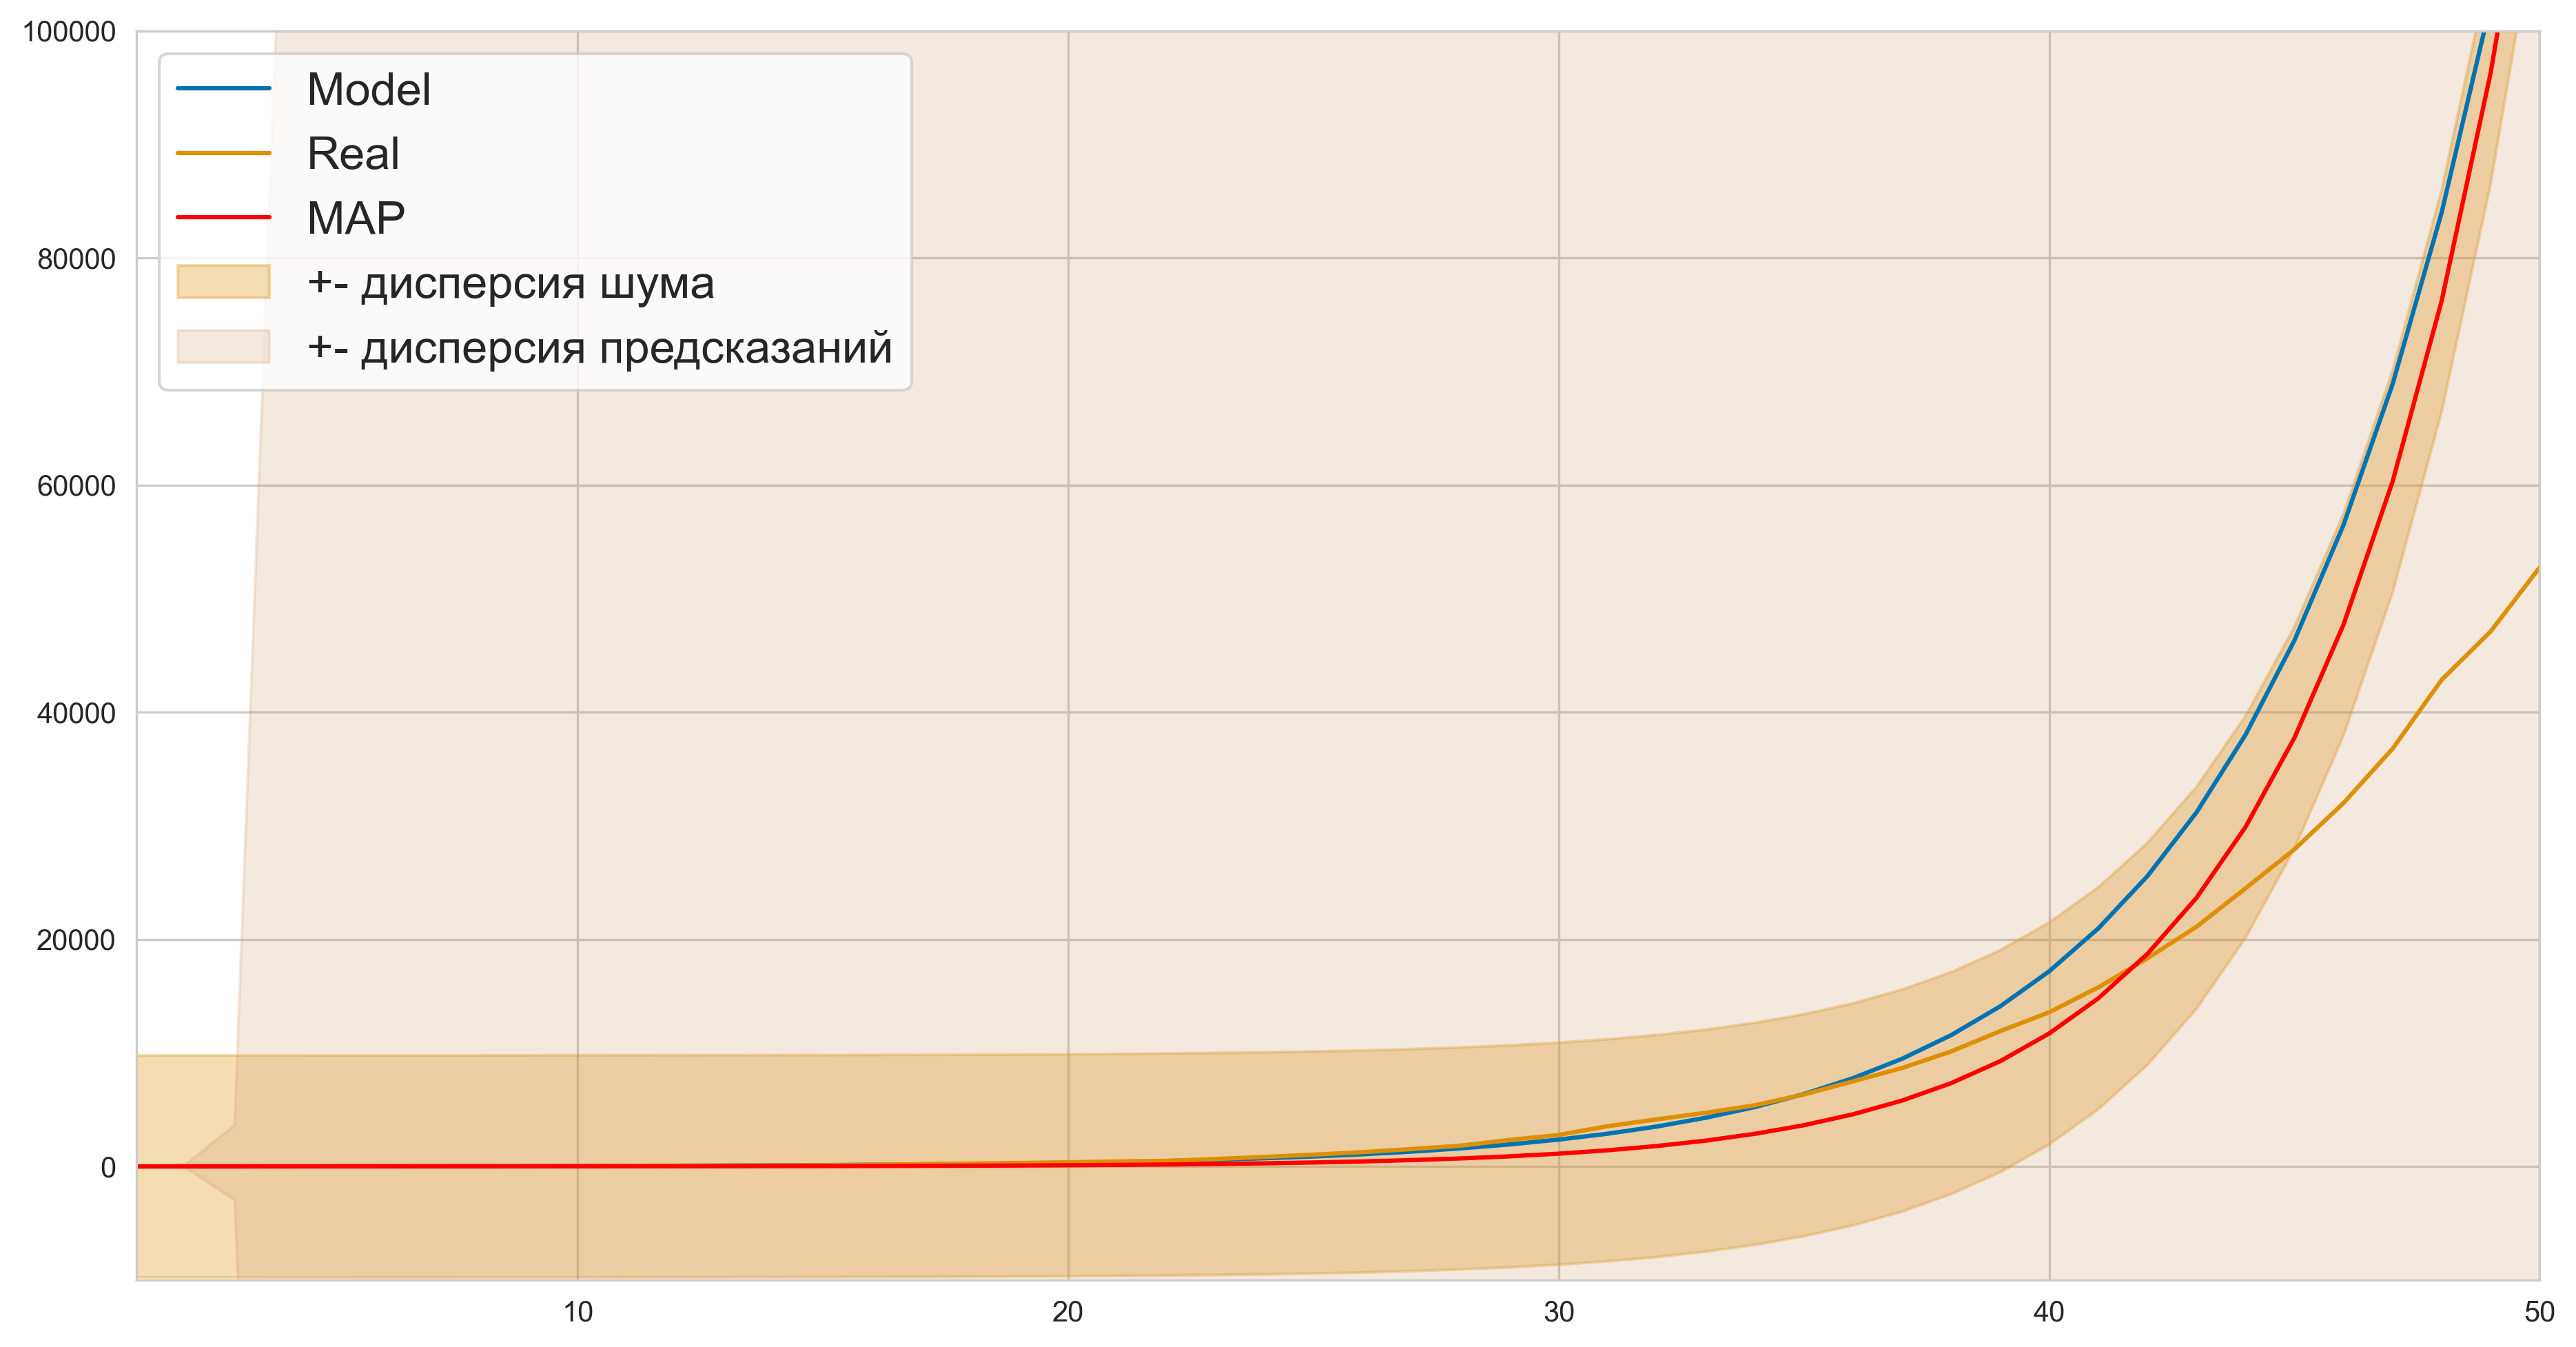

In [2318]:
# Нарисуем результат
def plot_predictions(xs, mu, x, points):
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    ax.set_xlim((xs[0], 50))
    ax.set_ylim((-10000, 100000))
    ax.plot(xs, true_curve(xs), label="Model")
    ax.plot(xs, y_train, label="Real")

    ax.plot(xs, np.exp(mu[1]*xs + mu[0]), color="red", label="MAP")
    ax.fill_between(xs, np.exp(mu[1]*xs + mu[0]) - sigma_noise, np.exp(mu[1]*xs + mu[0]) + sigma_noise, color=palette[1], alpha=.3, label="+- дисперсия шума")
    ax.fill_between(xs, np.mean(x, axis=0) - np.std(x, axis=0), np.mean(x, axis=0) + np.std(x, axis=0), color=palette[5], alpha=.2, label="+- дисперсия предсказаний")
    ax.legend(fontsize=legend_fontsize)
    
xs = train.index+1
x = sample_statistics(cur_mu, cur_sigma, xs, n=1000)
plot_predictions(xs, cur_mu, x, [[train.index], [y_pred]])

Посэмплируйте много разных экспонент, постройте графики. Сколько, исходя из этих сэмплов, предсказывается случаев коронавируса в России к 1 мая? к 1 июня? к 1 сентября? 

In [2311]:
test_date = [('1 мая:', test[test.date == '2020-05-01'].index[0] + 1), 
             ('1 июня:', test[test.date == '2020-06-01'].index[0] + 1), 
             ('1 сентября:', test[test.date == '2020-09-01'].index[0] + 1)]

In [2313]:
for i in test_date:
    x = sample_statistics(cur_mu, cur_sigma, np.array([i[1]]), n=100)
    print('Случаев к', i[0], round(np.median(x)))

Случаев к 1 мая: 5455575245658
Случаев к 1 июня: 4747798553111459840
Случаев к 1 сентября: 41059958546713716467957760


### что-то баесовский вывод у меня не получился мне кажется(((


# 3 Линейная регрессия с сигмоидальной функцией зависимости

In [2346]:
# Прологарифмируем число заболевших для последущего обучения модели
y_log = np.log(train[['new_cases']]).values

# Добавим квадратичную функцию зависимости
train_data = np.vstack((np.array(train.index), (np.array(train.index))**2)).transpose()

test_data = np.vstack((np.array(test_df.index), (np.array(test_df.index))**2)).transpose()


[[ 0.27561875 -0.00182971]] [-0.39655336]


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 <a list of 50 Text major ticklabel objects>)

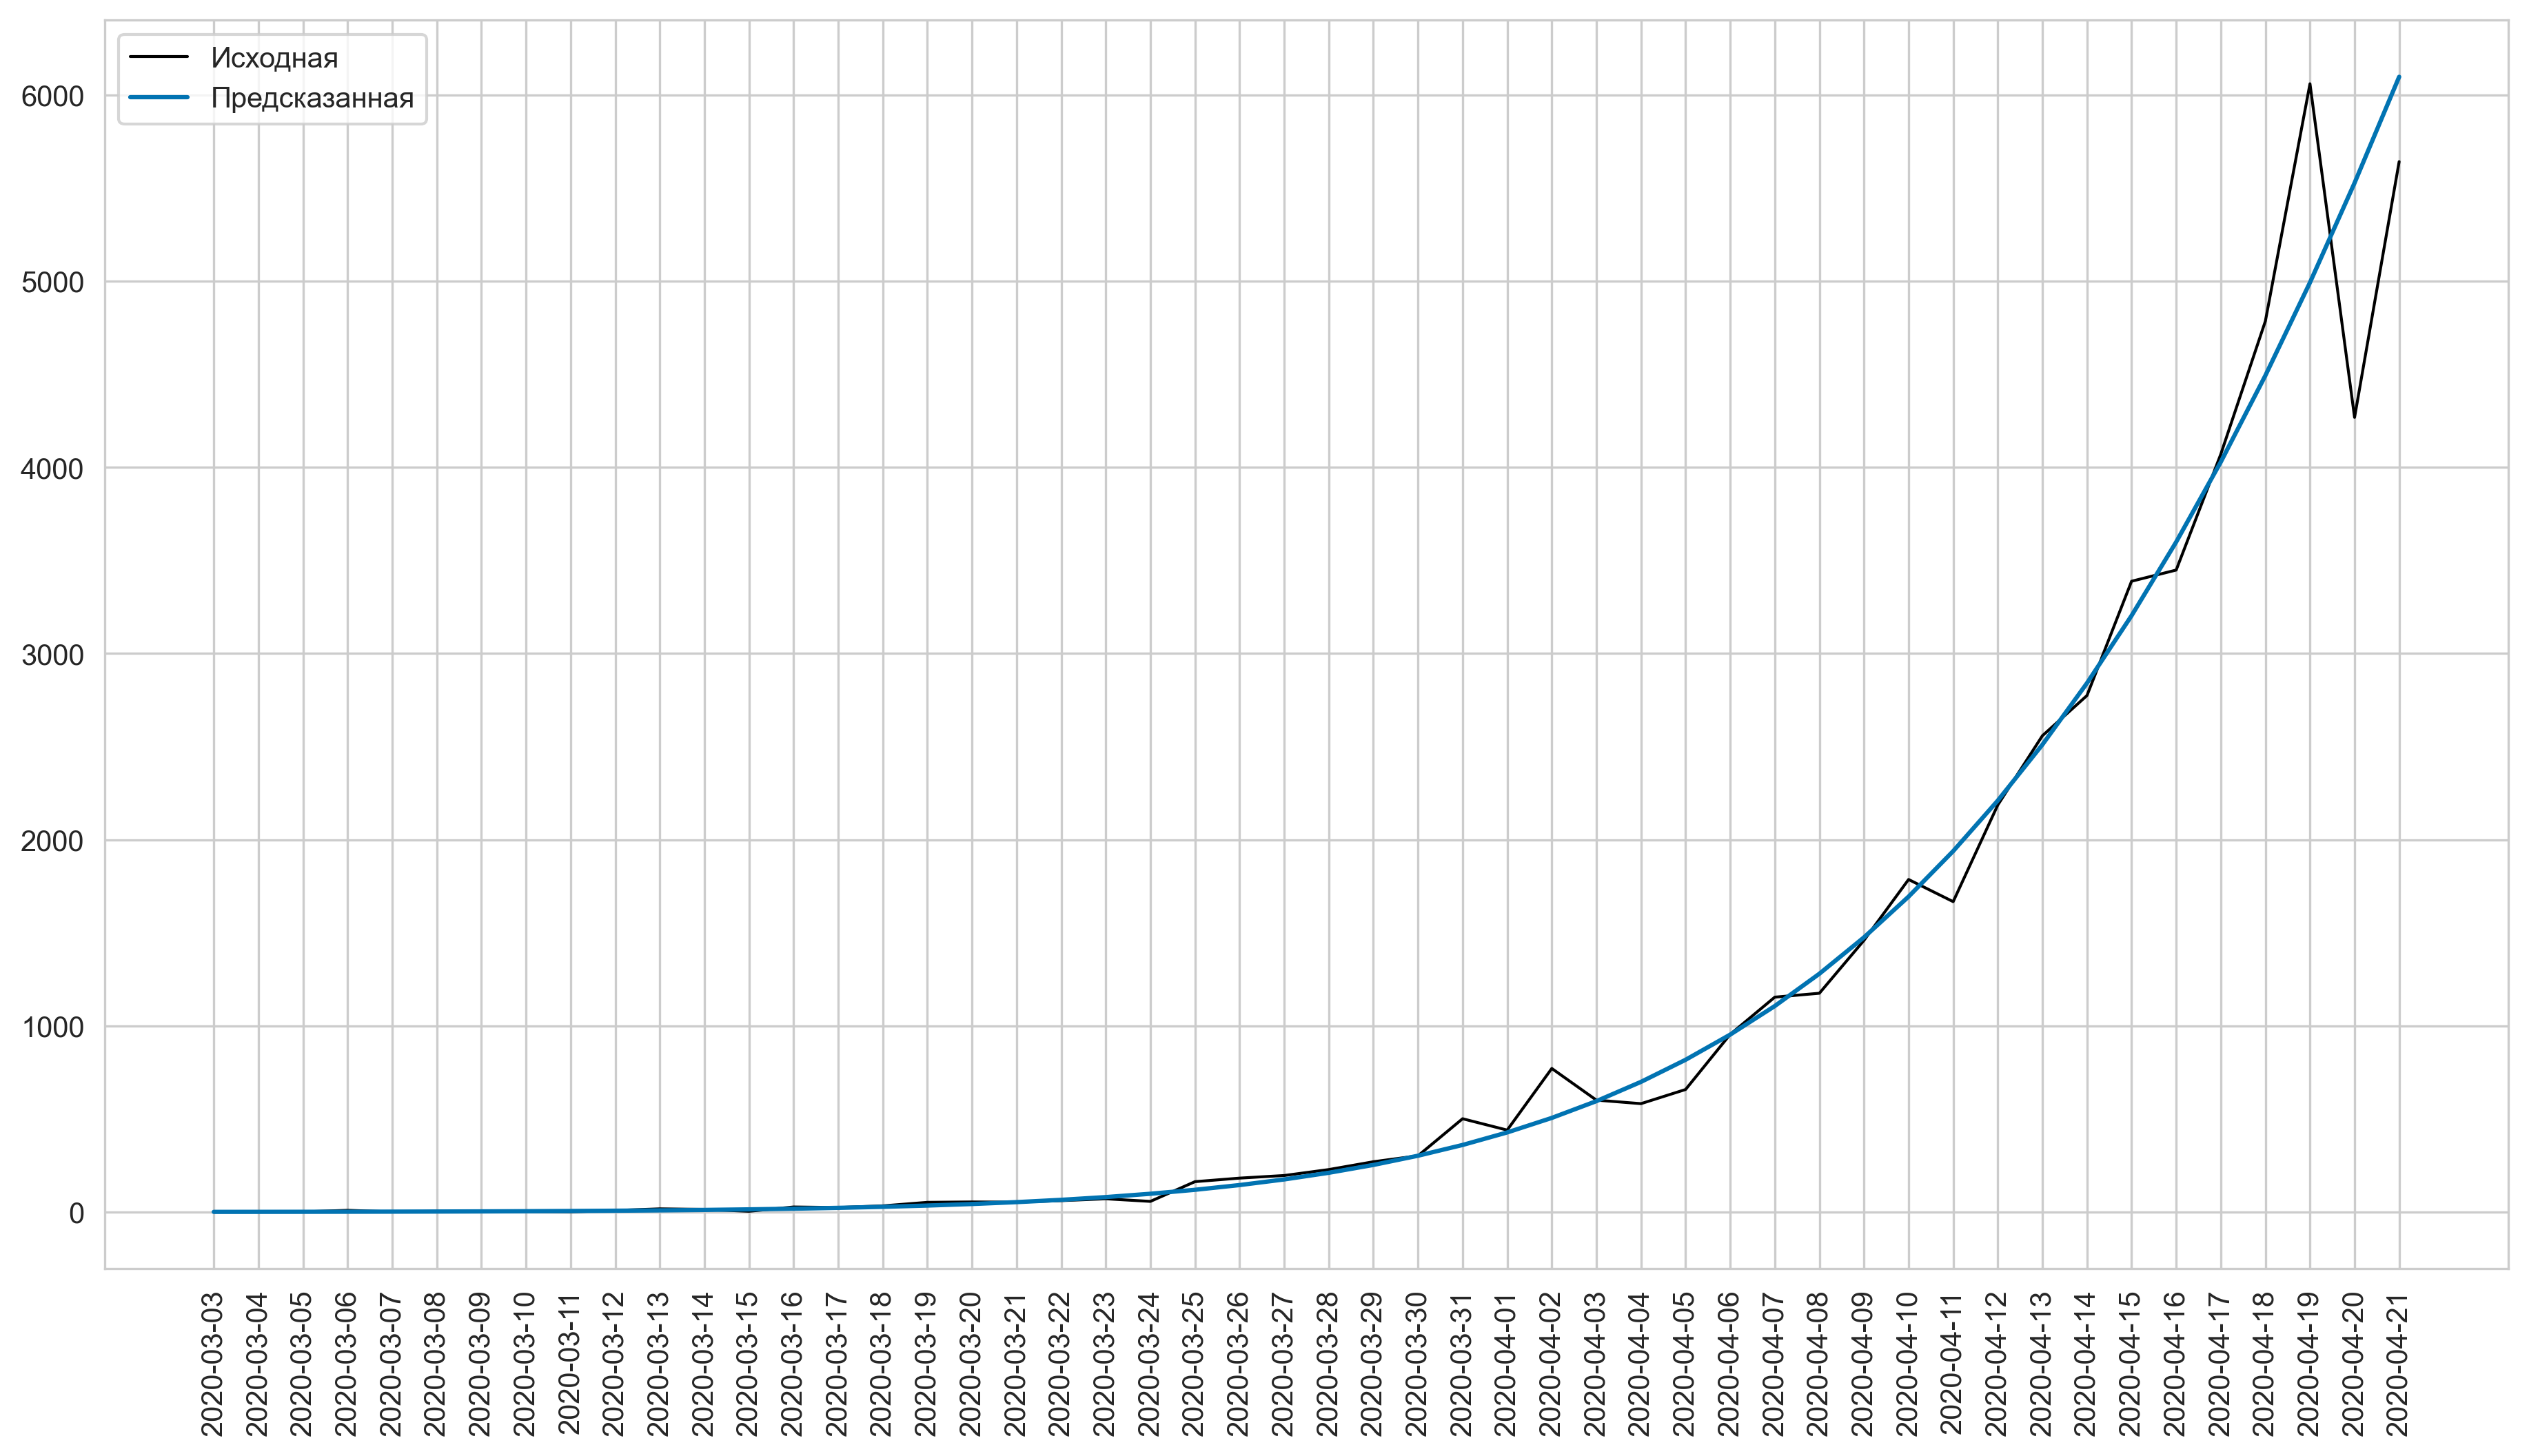

In [2347]:
# Обучаем линейную регрессию с использованием регуляризации 
alpha = 0.01
use_lasso = False
n = 50

sns.set_style("whitegrid")
sns.set_palette("colorblind")
palette = sns.color_palette()
figsize = (15,8)
legend_fontsize = 16

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.plot(test_df.date[:n], test_df.new_cases[:n], linewidth=1, color="black")

new_model = train_model(train_data, y_log, alpha, use_lasso)
print(new_model.coef_, new_model.intercept_)
# Не забываем обратно перевести предсказанные данные через экспаненту
y_pred = np.exp(new_model.predict(test_data[:n]))

ax.plot(test_df.date[:n], y_pred)
ax.legend(['Исходная', 'Предсказанная'])
plt.xticks(rotation=90)


#### Построим модель с предсказаниями общего числа заболевших

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149],
 <a list of 150 Text major ticklabel objects>)

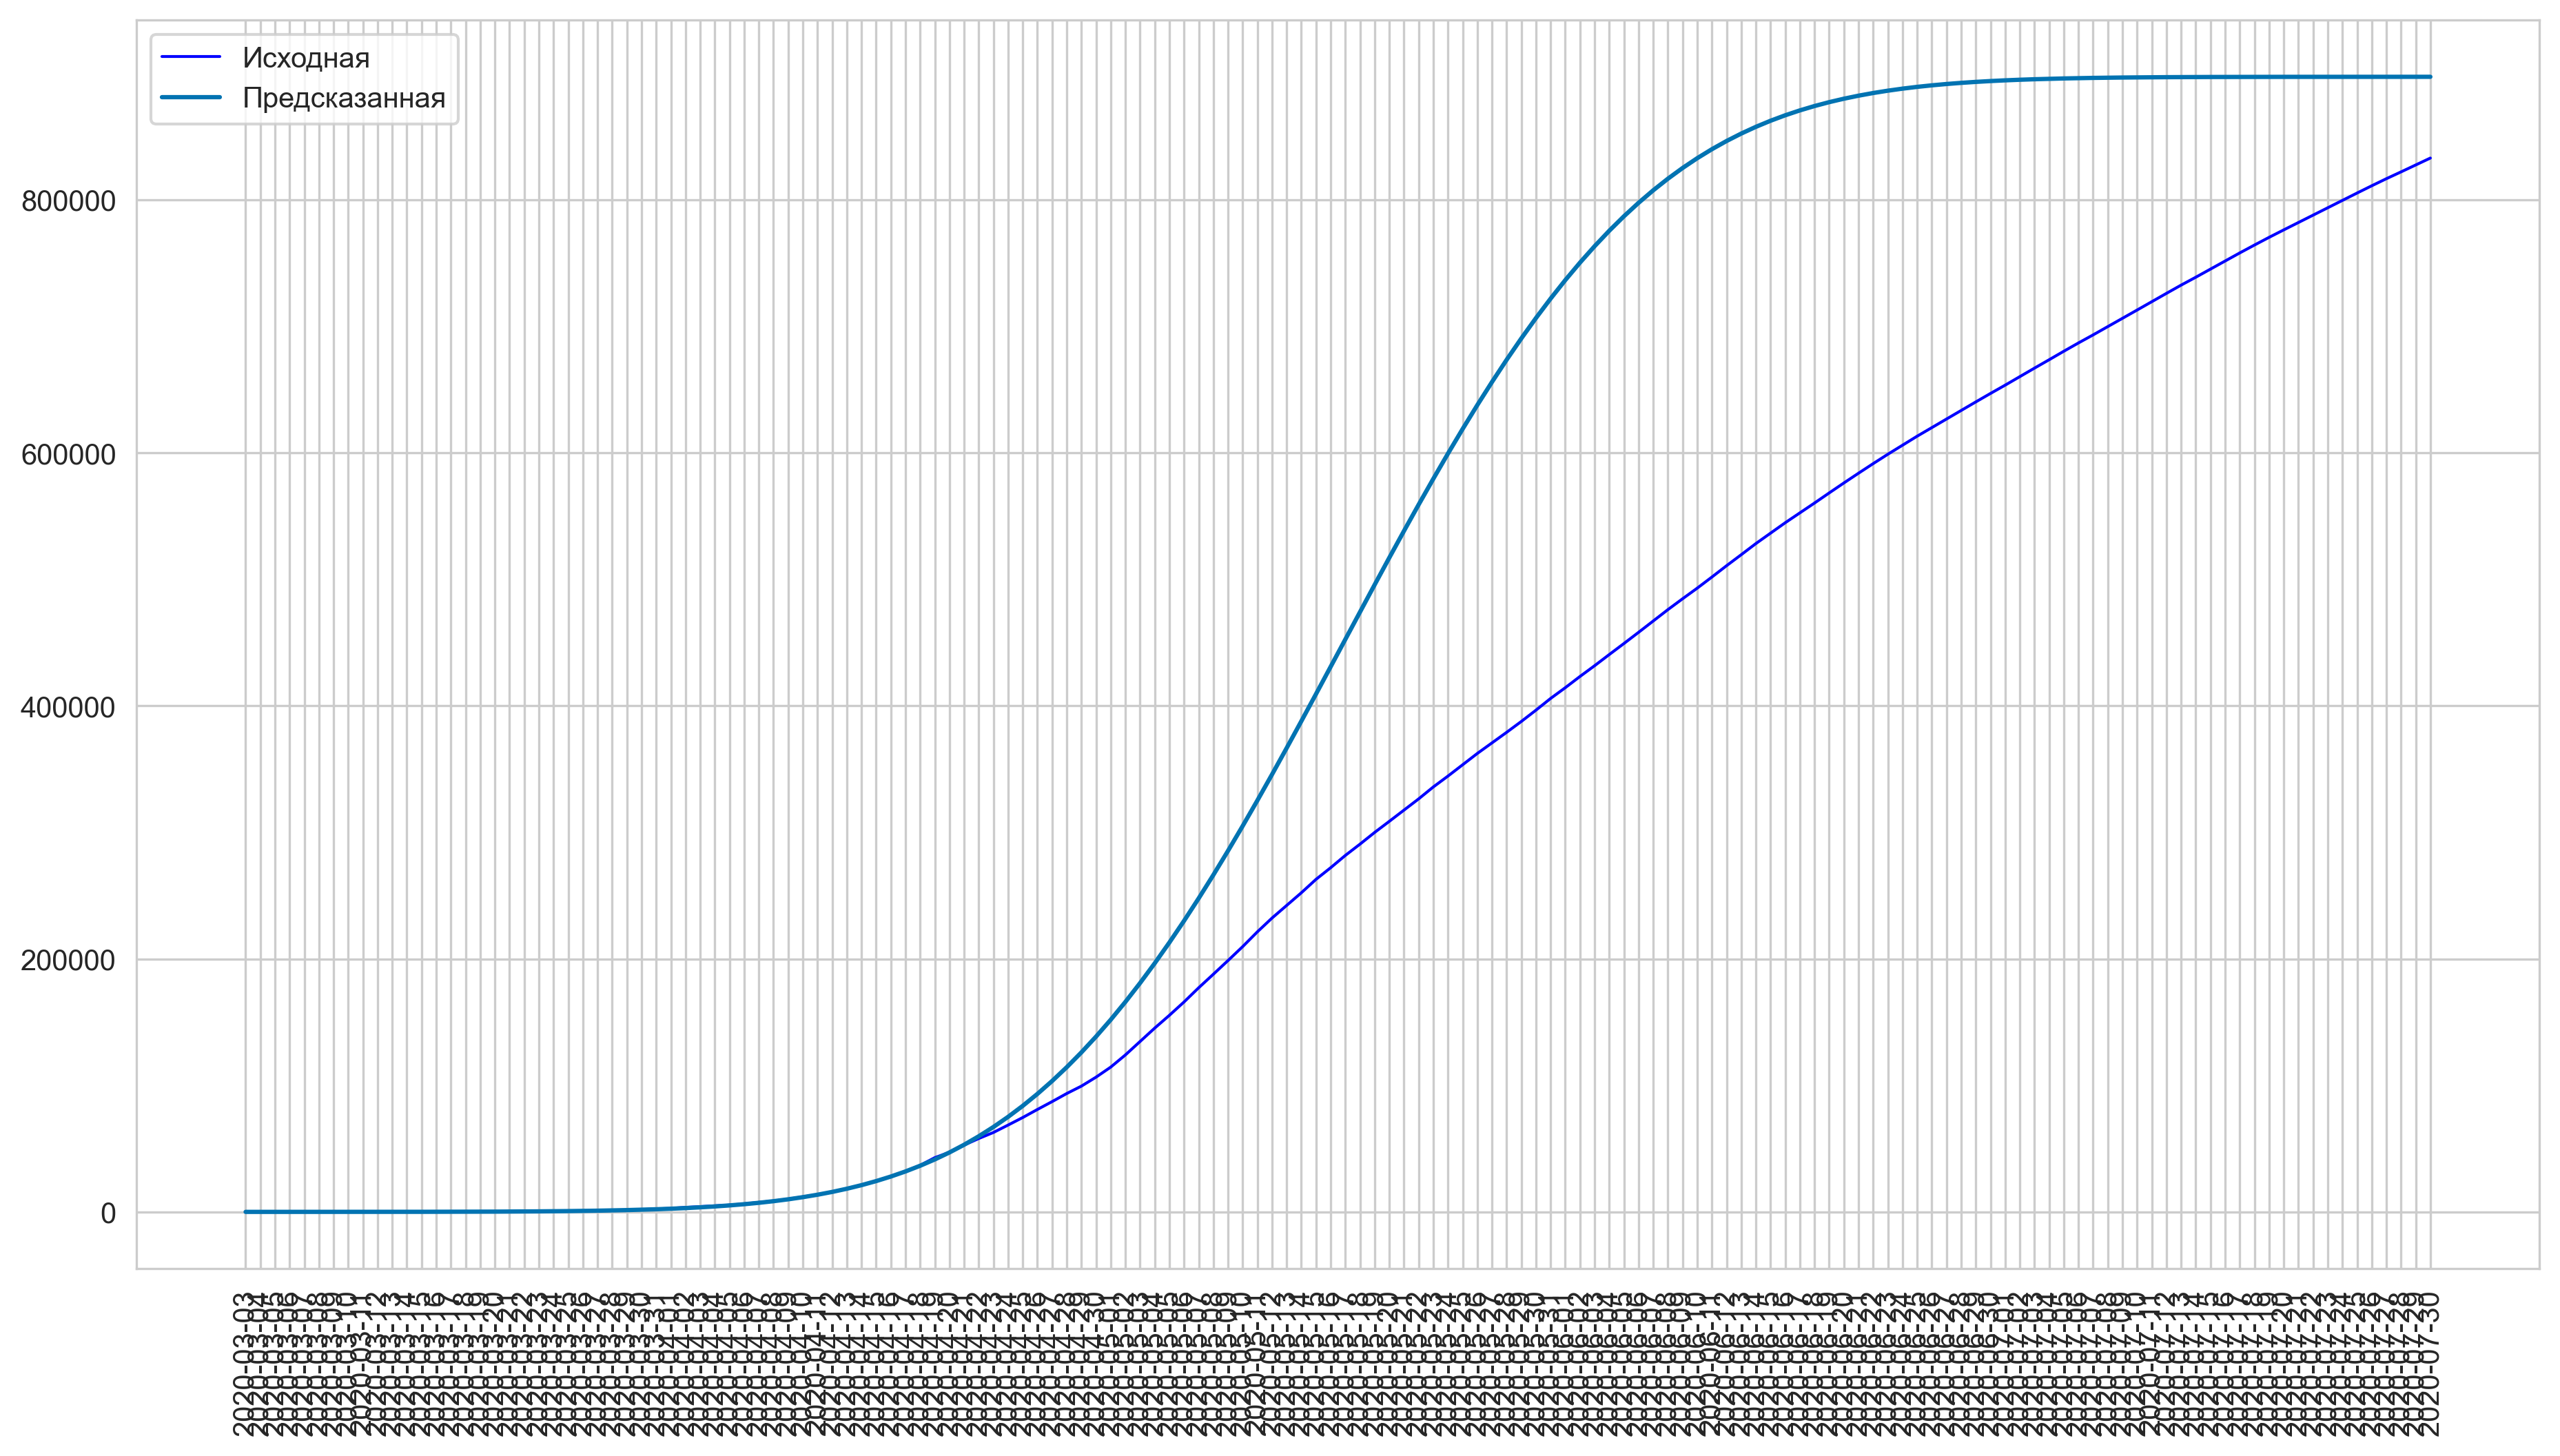

In [2356]:
n = 150
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.plot(test_df.date[:n], test_df.total_cases[:n], linewidth=1, label="Total_cases", color="b")
y_pred = np.exp(new_model.predict(test_data[:n]))
pred_total = pd.Series(y_pred.reshape(1,y_pred.shape[0])[0])
for i in pred_total.index[1:]:
    pred_total[i] = pred_total[i-1] + pred_total[i]

ax.plot(test_df.date[:n], pred_total)
ax.legend(['Исходная', 'Предсказанная'])
plt.xticks(rotation=90)


#### Предсказания по заболевшим выходит на плато в районе около 900000 человек

In [2358]:
# Запомним параметры обученной модели
w, intersept = new_model.coef_, new_model.intercept_
w, intersept

(array([[ 0.27561875, -0.00182971]]), array([-0.39655336]))

In [2359]:
# Определим среднеквадратичное отклонение шума 
noise = (train.new_cases.values - y_pred[:50].reshape(1,50))
sigma_noise = noise.std()
sigma_noise

11773.329172666243

In [2360]:
def bayesian_update(mu, sigma, x, y, sigma_noise):
    x_matrix = np.array([[1, x, x**2]])
    sigma_n = np.linalg.inv(np.linalg.inv(sigma)+ (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), x_matrix) )
    mu_n = np.matmul(sigma_n, np.matmul(np.linalg.inv(sigma), np.transpose(mu)) + (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), np.array([y]) ) )
    return mu_n, sigma_n

In [2361]:
# Посэмплируем прямые и выдадим статистики по предсказаниям
def true_curve(x):
    return  np.exp(w[0][0] * x + w[0][1] * x**2 + intersept)


def sample_statistics(mu, sigma, xs, n=100):
    my_w = np.random.multivariate_normal(mu, sigma, n)
    res = np.zeros((n, xs.shape[0]))
    for i,w_ in enumerate(my_w):
        res[i,:] = np.exp(w_[0] + w_[1] * xs + w_[2] * xs**2)
    return res

In [2362]:
cur_mu, cur_sigma = np.array([0, 0, 0]), 0.05*np.eye(3)
print(cur_mu, cur_sigma)
xd = train.index
data = train.new_cases
for i in range(1, xd.shape[0]):
    cur_mu, cur_sigma = bayesian_update(cur_mu, cur_sigma, xd[i], data[i], sigma_noise)
cur_mu, cur_sigma

[0 0 0] [[0.05 0.   0.  ]
 [0.   0.05 0.  ]
 [0.   0.   0.05]]


(array([1.85371409e-05, 7.85294449e-04, 3.39864121e-02]),
 array([[ 4.99999991e-02, -2.17074613e-08, -7.13796872e-07],
        [-2.17074613e-08,  4.99992852e-02, -2.64970535e-05],
        [-7.13796872e-07, -2.64970535e-05,  4.89508585e-02]]))

<ipython-input-2361-b29e9c3791b7>:10: RuntimeWarning: overflow encountered in exp
  res[i,:] = np.exp(w_[0] + w_[1] * xs + w_[2] * xs**2)
<ipython-input-2369-cb705ab29058>:10: RuntimeWarning: overflow encountered in exp
  ax.plot(xs, np.exp(mu[2] * xs**2 + mu[1] * xs + mu[0]), color="red", label="MAP")
<ipython-input-2369-cb705ab29058>:11: RuntimeWarning: overflow encountered in exp
  ax.fill_between(xs, np.exp(mu[2] * xs**2 + mu[1] * xs + mu[0]) - sigma_noise,
<ipython-input-2369-cb705ab29058>:12: RuntimeWarning: overflow encountered in exp
  np.exp(mu[2] * xs**2 + mu[1] * xs + mu[0]) + sigma_noise, color=palette[1], alpha=.3, label="+- дисперсия шума")
C:\Users\faina\anaconda3\lib\site-packages\numpy\core\_methods.py:230: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
C:\Users\faina\anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


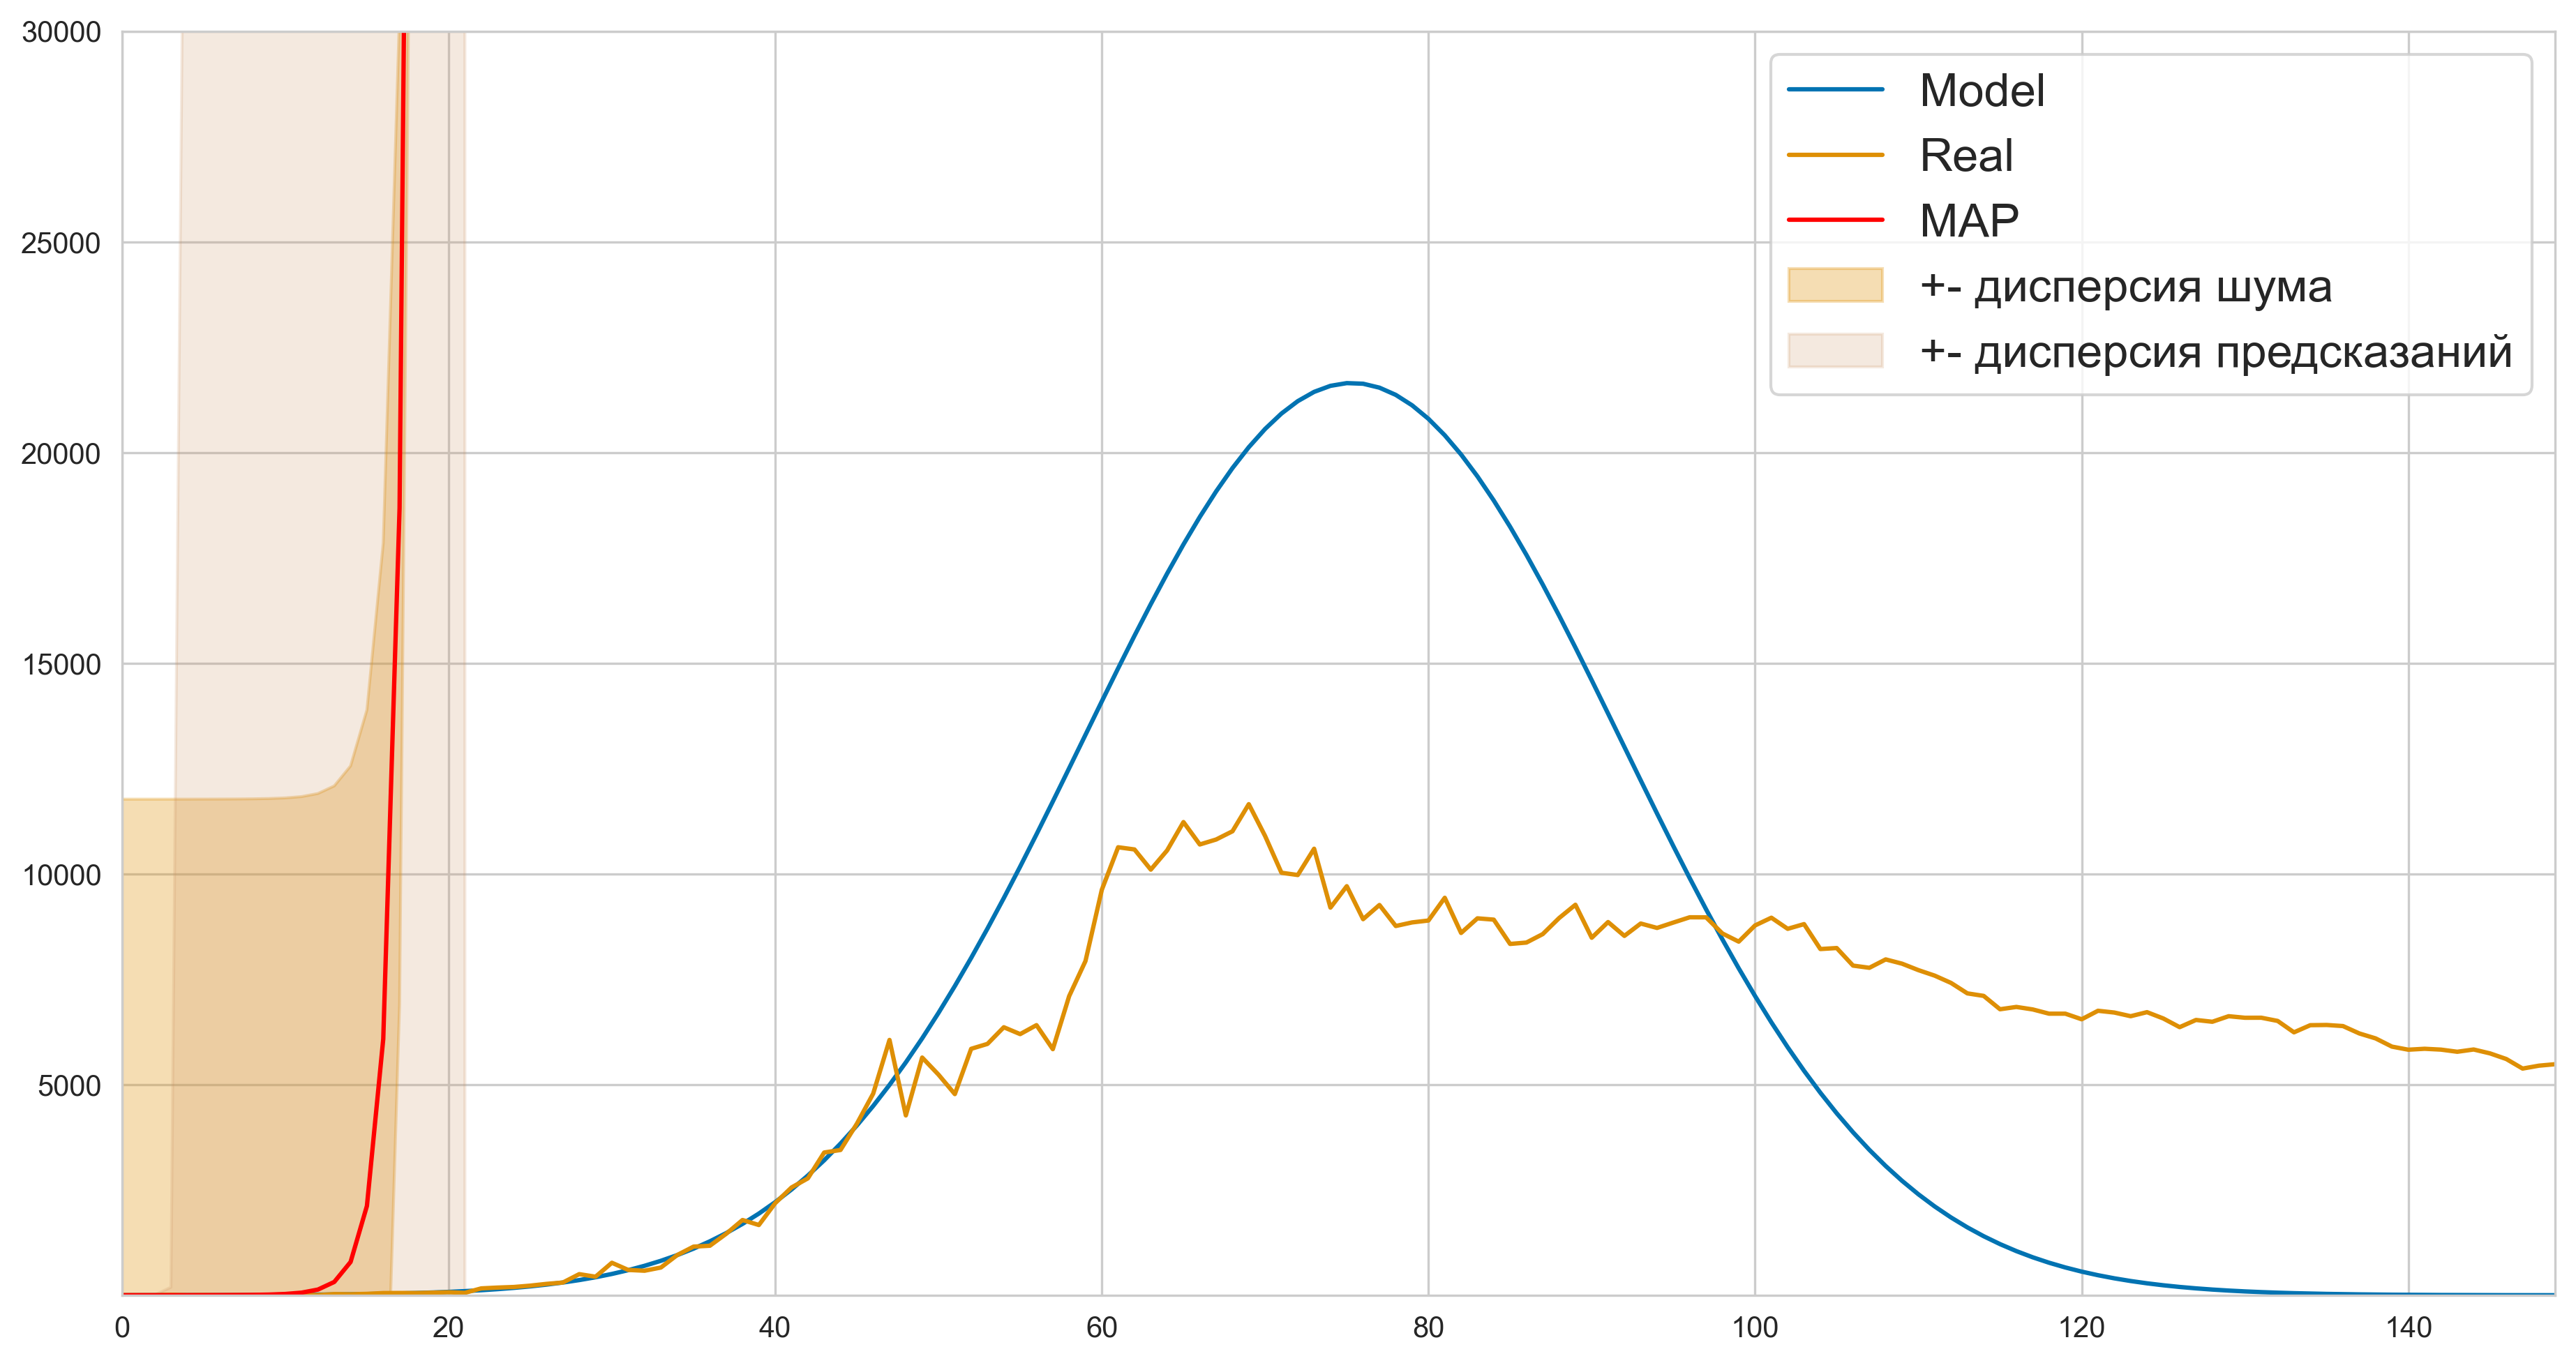

In [2369]:
# Нарисуем результат
def plot_predictions(xs, mu, x, points, y, a):
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    ax.set_xlim((xs[0], xs[-1]))
    ax.set_ylim((np.min(points[1]), 30000))
    ax.plot(xs, true_curve(xs), label="Model")
    ax.plot(xs, test_df.new_cases[:n], label="Real")

    ax.plot(xs, np.exp(mu[2] * xs**2 + mu[1] * xs + mu[0]), color="red", label="MAP")
    ax.fill_between(xs, np.exp(mu[2] * xs**2 + mu[1] * xs + mu[0]) - sigma_noise, 
                    np.exp(mu[2] * xs**2 + mu[1] * xs + mu[0]) + sigma_noise, color=palette[1], alpha=.3, label="+- дисперсия шума")
    ax.fill_between(xs, np.mean(x, axis=0) - np.std(x, axis=0), np.mean(x, axis=0) + np.std(x, axis=0), color=palette[5], alpha=.2, label="+- дисперсия предсказаний")
    ax.legend(fontsize=legend_fontsize)

n=150    
xs = test_df.index[:n]
x = sample_statistics(cur_mu, cur_sigma, xs, n=100)
plot_predictions(xs, cur_mu, x, [[xs], [y_pred]], data, 0)

In [2355]:
test_date = [('1 февраля 2022 года:', test[test.date == '2022-02-01'].index[0] + 1)]
for i in test_date:
    x = sample_statistics(cur_mu, cur_sigma, np.array([i[1]]), n=1000)
    print('Случаев к', i[0], np.median(x))

Случаев к 1 февраля 2022 года: inf


<ipython-input-2352-b29e9c3791b7>:10: RuntimeWarning: overflow encountered in exp
  res[i,:] = np.exp(w_[0] + w_[1] * xs + w_[2] * xs**2)


# И тут чтото баес не получился( Хотелось бы получить фидбек и доделать баес. В линейном случае( когда все точки на прямой) удалось воспроизвести баесовский вывод, а в данной постановке не могу понять где ошибка. Уж очень долго его мурыжила и вникала. Спасибо.

Постройте эмпирическое предсказательное распределение, нарисуйте графики. Каков ваш прогноз числа случаев коронавируса в пессимистичном сценарии (90-й процентиль в выборке числа случаев)? В оптимистичном сценарии (10-й процентиль)?


In [2345]:
data = np.vstack((np.array(df.index),(np.array(df.index))**2)).transpose()


In [897]:
test_data = np.vstack((np.array(test.index) + 1))
y_10_percentile, y_90_percentile = [], []

for i in test_data:
    x = sample_statistics(cur_mu, cur_sigma, np.array([i]), n=100)
    y_10_percentile.append(np.percentile(x, 10))
    y_90_percentile.append(np.percentile(x, 90))

y_pred_test = np.exp(new_model.predict(data))

# Другие страны

In [1687]:
# Cлучайным образом выберем 10 стран из датасета

countries = list(set(random.choices(data.location.unique(), k = 10)))

df_countries = pd.DataFrame()
for country in countries:
    df = data[data.location == country]
    try:
        date = df[df.new_cases >= 10].iloc[0].date
        df_countries[country + '_new_cases'] = df[df.date >= date].reset_index().new_cases
        df_countries[country + '_new_cases'][df_countries[country + '_new_cases'] == 0] = 1
        df_countries[country + '_total_cases'] = df[df.date >= date].reset_index().total_cases 
    except:
        pass
df_countries.head()

# Cразу поделим данные на трейн и тест
df_countries_train = df_countries[0:50]
df_countries_test = df_countries[50:]

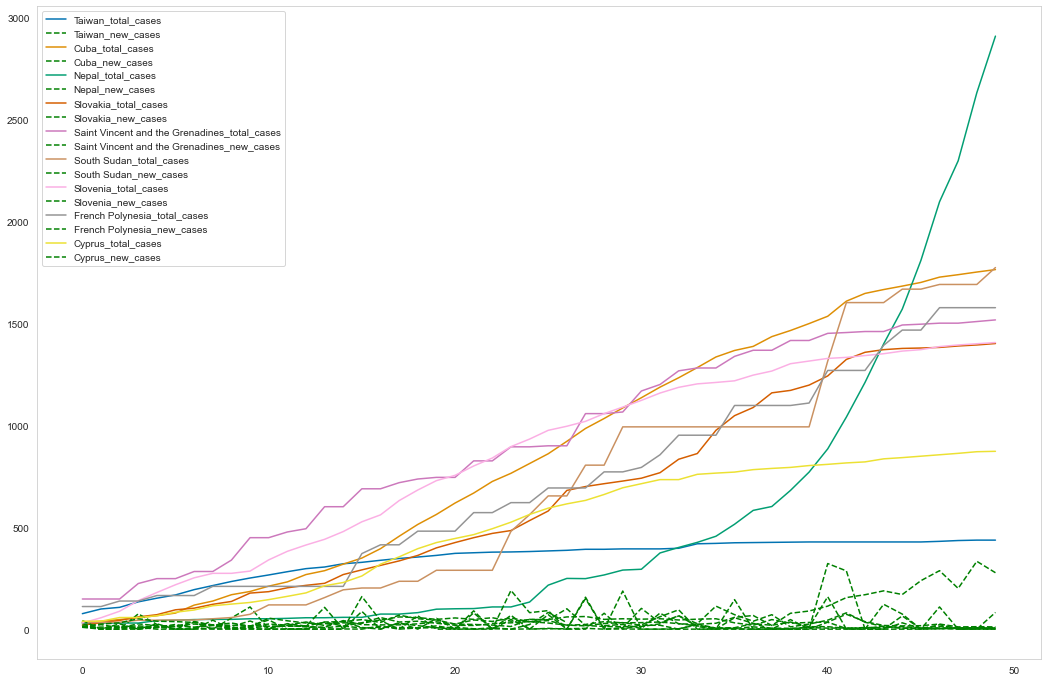

In [1688]:
import matplotlib.pyplot as plt 
%matplotlib inline

f, ax = plt.subplots(1, 1, figsize=(18, 12))
legend = []
for country in countries:
    try:
        ax.plot(df_countries_train.index, df_countries_train[country + '_total_cases']) 
        ax.plot(df_countries_train.index, df_countries_train[country + '_new_cases'], '--',  c='g') 
        
        legend.append(country + '_total_cases')
        legend.append(country + '_new_cases')

    except:
        pass
    
ax.legend(legend)
# plt.xticks(rotation=90) 
ax.grid()

По графику видно, что характер роста заболеваемости в разных странах в первые 50 дней (с момента числа общего количества заболевших больше 10) имеет разные зависимости. В какимх то странах мы наблюдаем такой же, как и в Росиии, экспоненциальный рост, а других сразу видно насыщение графиков.